In [1]:
using DelimitedFiles, Plots, LinearAlgebra, LsqFit, LaTeXStrings

In [2]:
flin(x,p) = @. p*x

flin (generic function with 1 method)

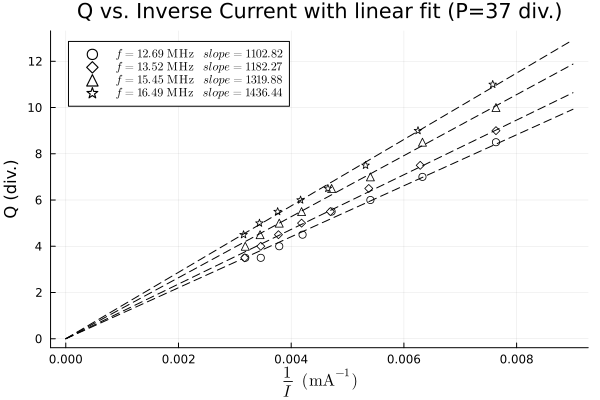

In [58]:
f = [ 12.69,13.52,15.45,16.49]
c=["red", "blue", "green", "purple", "cyan"]
mkr = [:circle, :diamond, :utriangle, :star5]
plot()
slp_arr=[]
for i in eachindex(f)
    datas = readdlm("f$(f[i])MHz.csv")
    curr = datas[2:end,4]
    Qvals = datas[2:end,2]
    ffit = curve_fit(flin, curr, Qvals, [1200.04])
    slp = round(ffit.param[1], digits=2)
    push!(slp_arr,slp)
    scatter!(curr, Qvals, label=L"f=%$(f[i]) \ \mathrm{MHz}\ \ \  slope = %$(slp)", markercolor=RGBA(1, 1, 1, 0.8), marker=mkr[i], fa=0.8)
    plot!(LinRange(0,0.009,40), flin(LinRange(0,0.009,40), ffit.param), c="black", label="", linestyle=:dash)
end
display(plot!(xlabel=L"\frac{1}{I} \ \ (\mathrm{mA}^{-1})", ylabel="Q (div.)",title="Q vs. Inverse Current with linear fit (P=37 div.)"))


In [59]:
μ_b = 9.274*1e-24
a = 7.7
n=500
h=6.626*1e-34
g(slp,f) = ((5*sqrt(125)*h*f*a)/(32*sqrt(2)*μ_b*n*pi))*(37/slp)*1e3*1e4
g_arr=[]
for i in eachindex(f)
    push!(g_arr, g(slp_arr[i], f[i]*1e6))
end
for i in eachindex(g_arr)
    println("f = ",f[i], "MHz", "  g=",g_arr[i])
end
println("\n average g:", sum(g_arr)/length(g_arr))

f = 12.69MHz  g=1.8419334522872115
f = 13.52MHz  g=1.8305304980103017
f = 15.45MHz  g=1.8737471381871846
f = 16.49MHz  g=1.837596319192916

 average g:1.8459518519194036


In [60]:
savefig("Slope.pdf")

"/home/shaggy1304/IISER/IISER_Courses/PH4103/Expt1/Slope.pdf"